In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import re
import os
import time

In [4]:
df = pd.read_csv('data.csv')

In [6]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [7]:
df["Wage"].head()


0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [13]:
df.Wage = df.Wage.str.replace("€","")
df.Wage = df.Wage.str.replace("K","").astype("float")
df.Wage.head() 

0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

In [8]:
df.ID.unique().shape


(18207,)

In [9]:
counts_preferred_foot = df['Preferred Foot'].value_counts()
counts_preferred_foot = counts_preferred_foot.reset_index()
counts_preferred_foot.columns = ["PreferredFoot","Count"]
print(counts_preferred_foot)

  PreferredFoot  Count
0         Right  13948
1          Left   4211


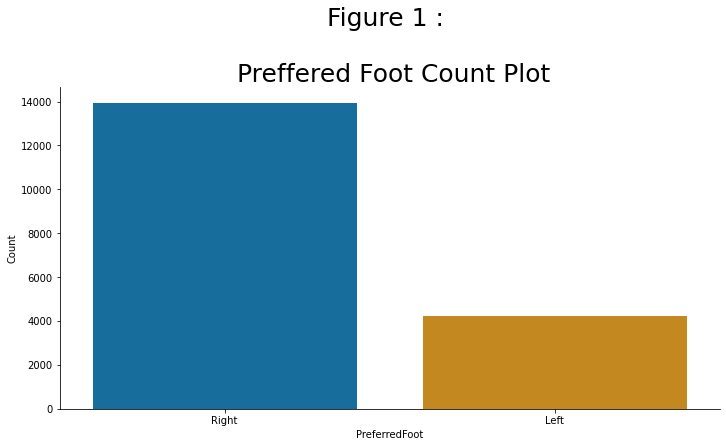

In [17]:
pt = sns.catplot(y="Count",
            x="PreferredFoot", data=counts_preferred_foot,
           palette="colorblind",height=5, aspect=2, kind="bar");
plt.style.use("ggplot")
plt.title("Figure 1 : \n\n Preffered Foot Count Plot",
          fontsize=25);

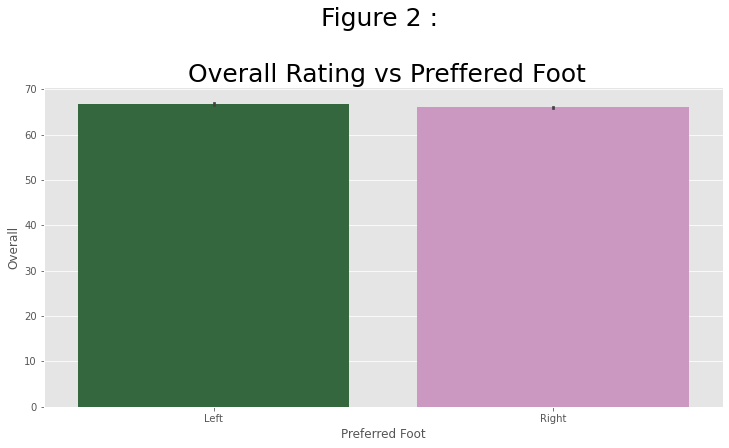

In [19]:
sns.catplot(x="Preferred Foot", y="Overall", data=df,
            aspect=2, kind="bar", palette="cubehelix");
plt.style.use("ggplot")
plt.title("Figure 2 : \n\n Overall Rating vs Preffered Foot",
          fontsize=25);

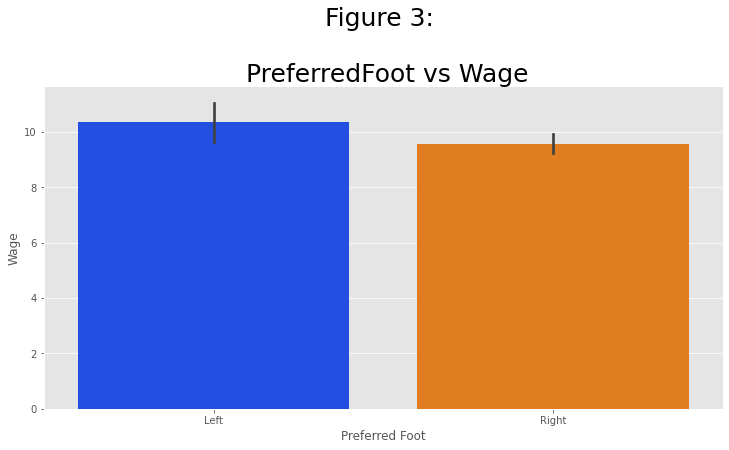

In [21]:
sns.catplot(x="Preferred Foot", y="Wage", data=df, aspect=2, kind="bar",palette="bright");
plt.style.use("ggplot")
plt.title("Figure 3: \n\n PreferredFoot vs Wage",
          fontsize=25);

In [23]:
counts_Nationality = df["Nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality.head()

,Nations,Counts
0,England,1662
1,Germany,1198
2,Spain,1072
3,Argentina,937
4,France,914


In [24]:
counts_Nationality_top20 = counts_Nationality.iloc[0:20,:]
print(counts_Nationality_top20)

                Nations  Counts
0               England    1662
1               Germany    1198
2                 Spain    1072
3             Argentina     937
4                France     914
5                Brazil     827
6                 Italy     702
7              Colombia     618
8                 Japan     478
9           Netherlands     453
10               Sweden     397
11             China PR     392
12                Chile     391
13  Republic of Ireland     368
14               Mexico     366
15        United States     353
16               Poland     350
17               Norway     341
18         Saudi Arabia     340
19              Denmark     336


Text(0.5, 1.0, 'Figure : \n\n\n Nation Wise Players Counts for top 20 country')

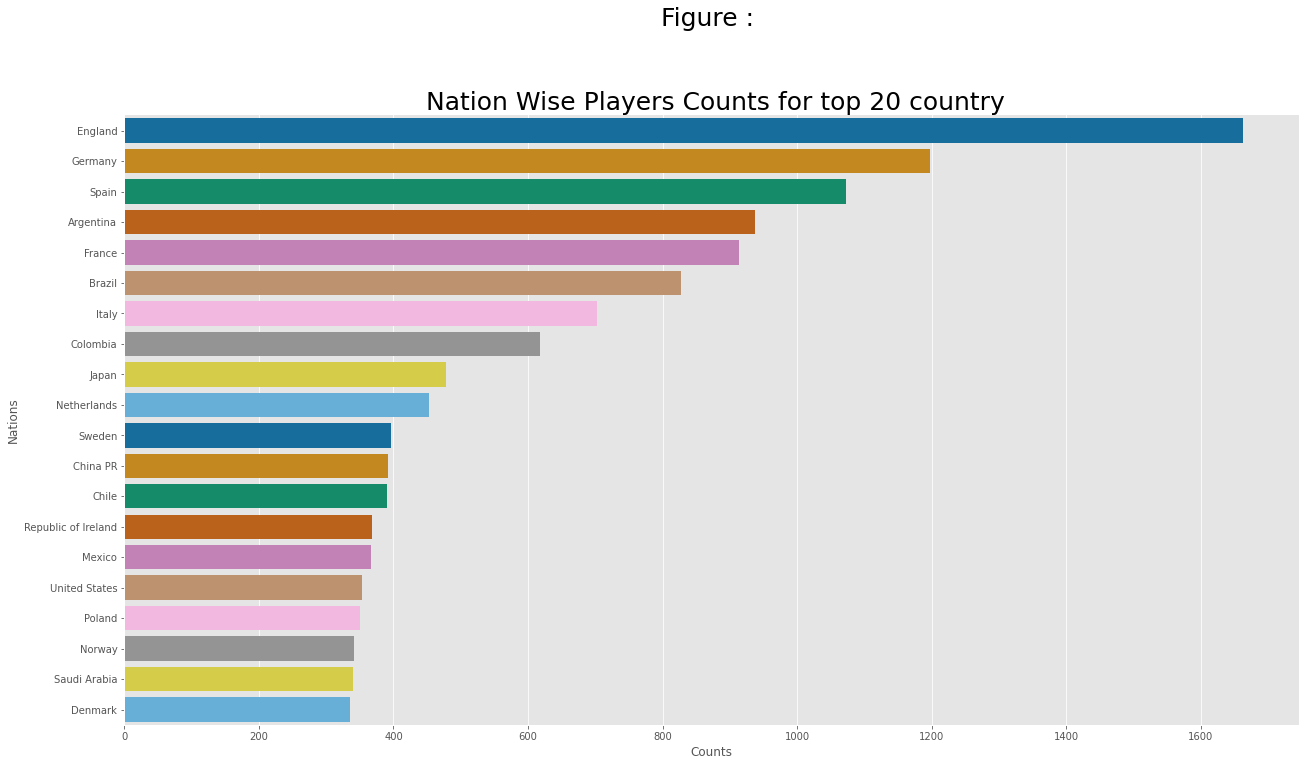

In [25]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality_top20,
            palette="colorblind",height=9,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Nation Wise Players Counts for top 20 country",
          fontsize=25)

In [27]:
avgwageoverall = df.groupby("Nationality", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492


In [29]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,Nationality,Wage,Overall
42,Dominican Republic,71.000000,72.000000
156,United Arab Emirates,39.000000,77.000000
56,Gabon,26.933333,69.466667
7,Armenia,22.000000,69.000000
35,Croatia,21.682540,69.563492
27,Central African Rep.,19.000000,73.333333
13,Belgium,18.480769,68.811538
2,Algeria,18.083333,70.633333
20,Brazil,17.778718,71.251511
47,Equatorial Guinea,17.200000,70.000000


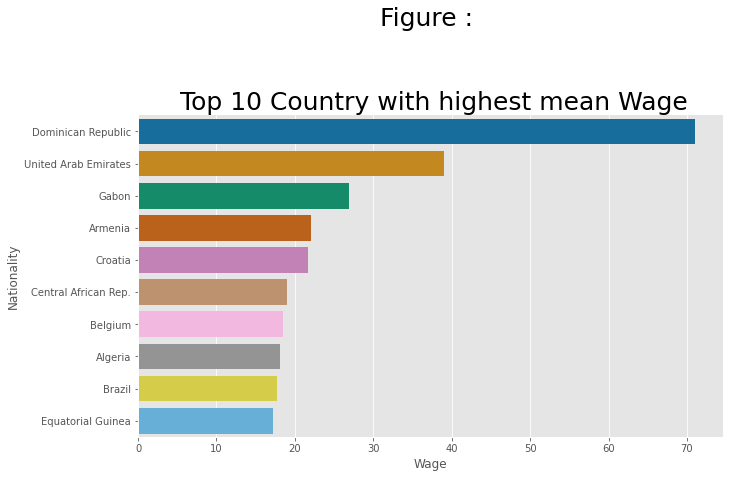

In [31]:
sns.catplot(y="Nationality",
            x="Wage",data=top10bywage,
            palette="colorblind",height=5,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage",
          fontsize=25);

In [33]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,Nationality,Wage,Overall
156,United Arab Emirates,39.000000,77.000000
27,Central African Rep.,19.000000,73.333333
77,Israel,15.857143,72.142857
42,Dominican Republic,71.000000,72.000000
147,São Tomé & Príncipe,15.000000,72.000000
116,Oman,12.000000,72.000000
26,Cape Verde,11.526316,71.631579
123,Portugal,14.310559,71.344720
150,Togo,16.000000,71.333333
20,Brazil,17.778718,71.251511


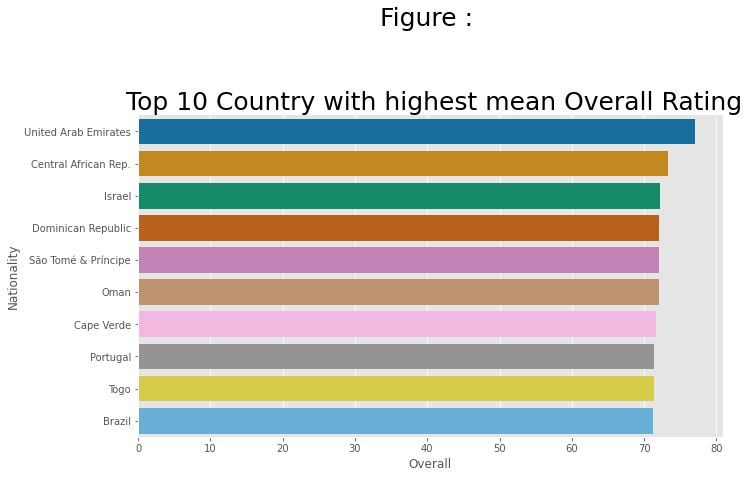

In [35]:
sns.catplot(y="Nationality",
            x="Overall",data=top10byoverall,
           height=5,kind="bar",aspect=2,palette="colorblind")
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating",
          fontsize=25);

In [37]:
avgwageoverall = df.groupby("Club", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Club,Wage,Overall
470,Real Madrid,152.030303,78.242424
212,FC Barcelona,146.575758,78.030303
326,Juventus,131.680000,82.280000
374,Manchester City,113.363636,76.727273
375,Manchester United,102.757576,77.242424


In [39]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

,Club,Wage,Overall
470,Real Madrid,152.030303,78.242424
212,FC Barcelona,146.575758,78.030303
326,Juventus,131.680000,82.280000
374,Manchester City,113.363636,76.727273
375,Manchester United,102.757576,77.242424
134,Chelsea,98.454545,76.787879
363,Liverpool,87.939394,76.000000
583,Tottenham Hotspur,79.484848,76.696970
214,FC Bayern München,78.827586,77.000000
52,Arsenal,78.424242,75.181818


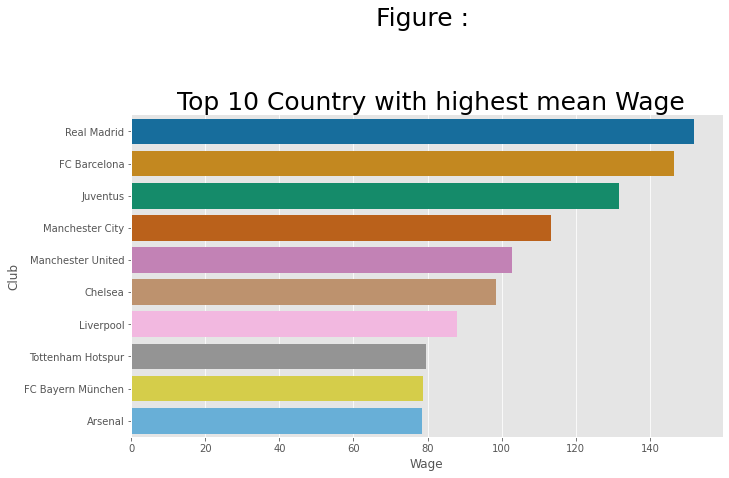

In [41]:
sns.catplot(y="Club",
            x="Wage",data=top10bywage,
           height=5,kind="bar",aspect=2,palette="colorblind")
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage",fontsize=25);

In [43]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

,Club,Wage,Overall
326,Juventus,131.680000,82.280000
398,Napoli,71.080000,80.000000
315,Inter,66.500000,79.750000
470,Real Madrid,152.030303,78.242424
382,Milan,72.481481,78.074074
212,FC Barcelona,146.575758,78.030303
435,Paris Saint-Germain,72.033333,77.433333
482,Roma,53.807692,77.423077
375,Manchester United,102.757576,77.242424
504,SL Benfica,12.035714,77.000000


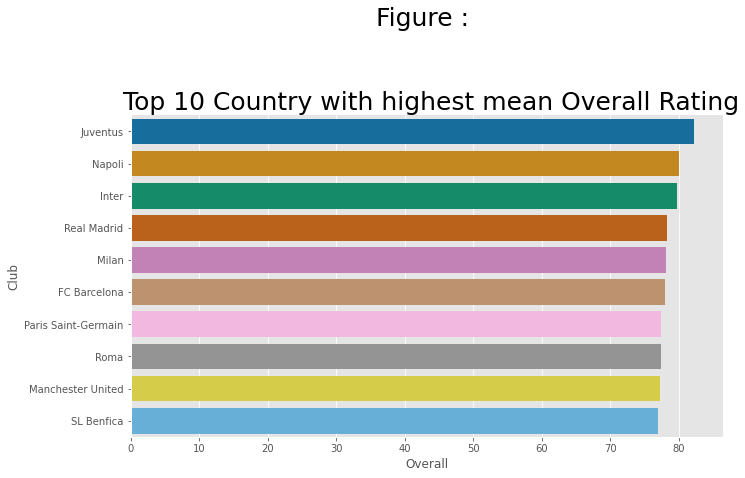

In [45]:
sns.catplot(y="Club",
            x="Overall",data=top10byoverall,
           height=5,kind="bar",aspect=2,palette="colorblind")
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating",fontsize=25);



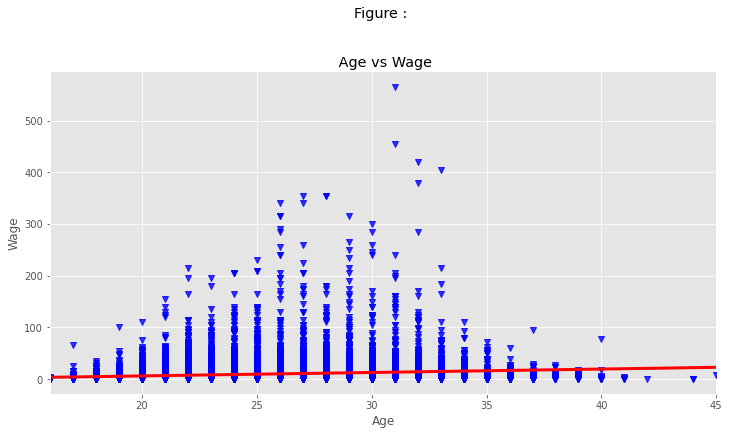

In [47]:
sns.lmplot(x="Age", y="Wage",data=df,markers="v",
            scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Age vs Wage");

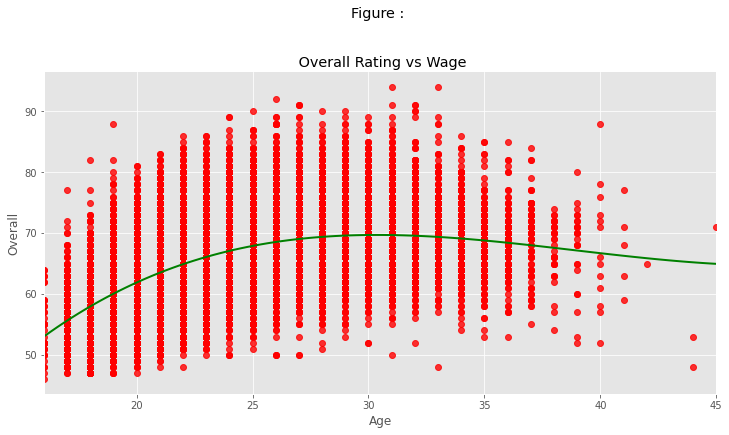

In [48]:
sns.lmplot(x="Age", y="Overall",data=df,markers="o",
           order=3, ci=None, scatter_kws={"color": "red"},
         line_kws={"linewidth":2,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Overall Rating vs Wage");


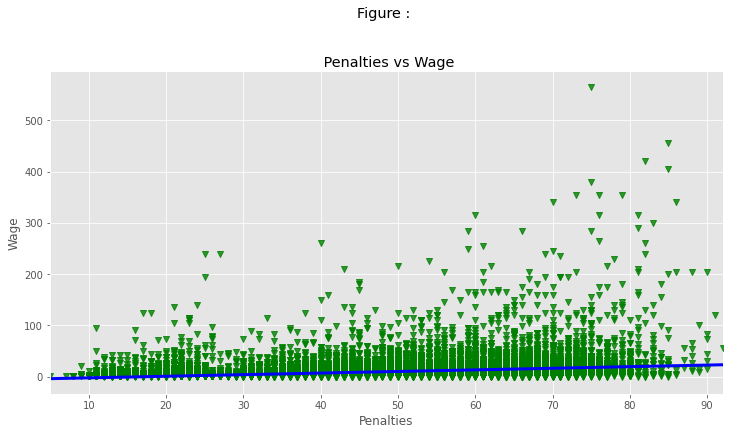

In [54]:
sns.lmplot(x="Penalties", y="Wage",data=df,markers="v",
            scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"blue"},aspect=2);
plt.title("Figure : \n\n\n Penalties vs Wage");

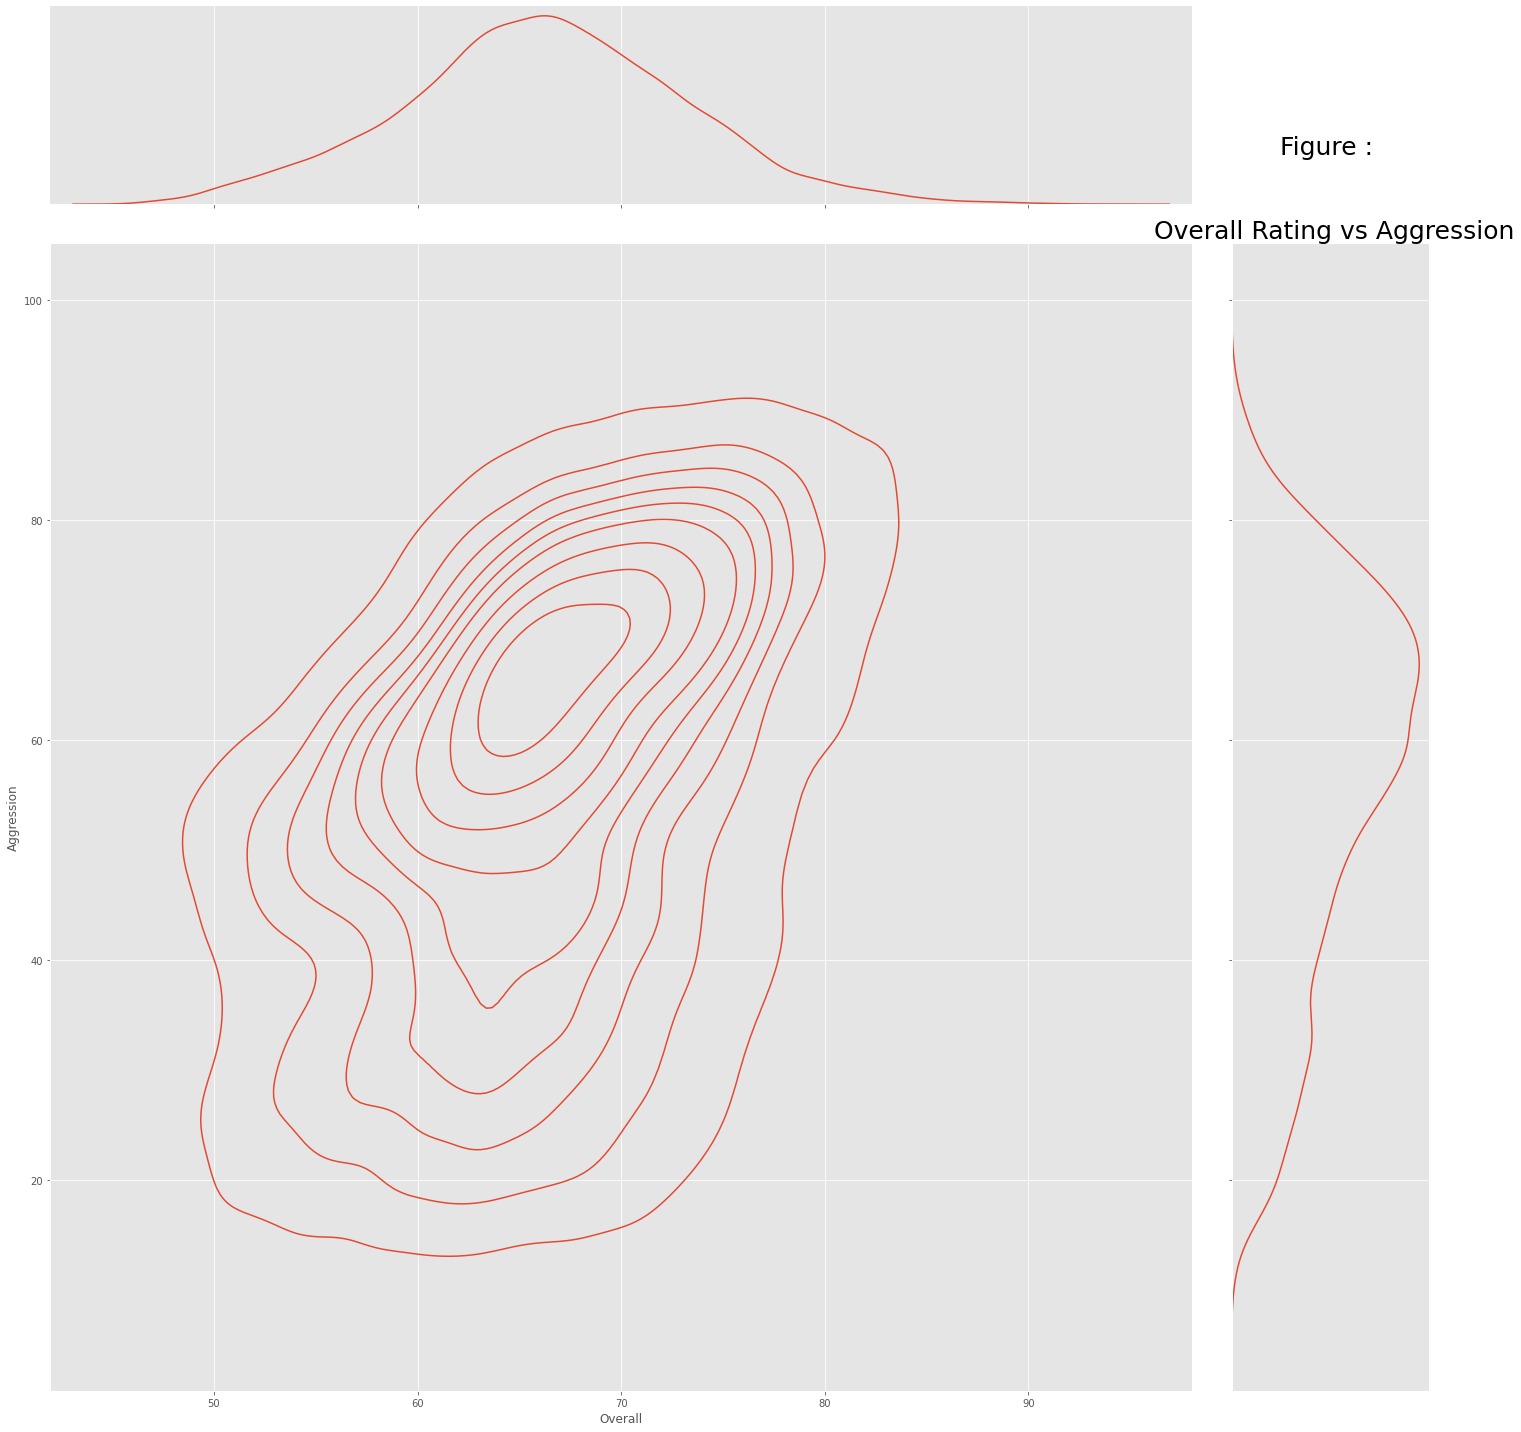

In [55]:
sns.jointplot(x="Overall", y="Aggression",data=df,
            
            kind="kde",height=20,palette="colorblind");
plt.title("Figure : \n\n\n Overall Rating vs Aggression", fontsize=25);

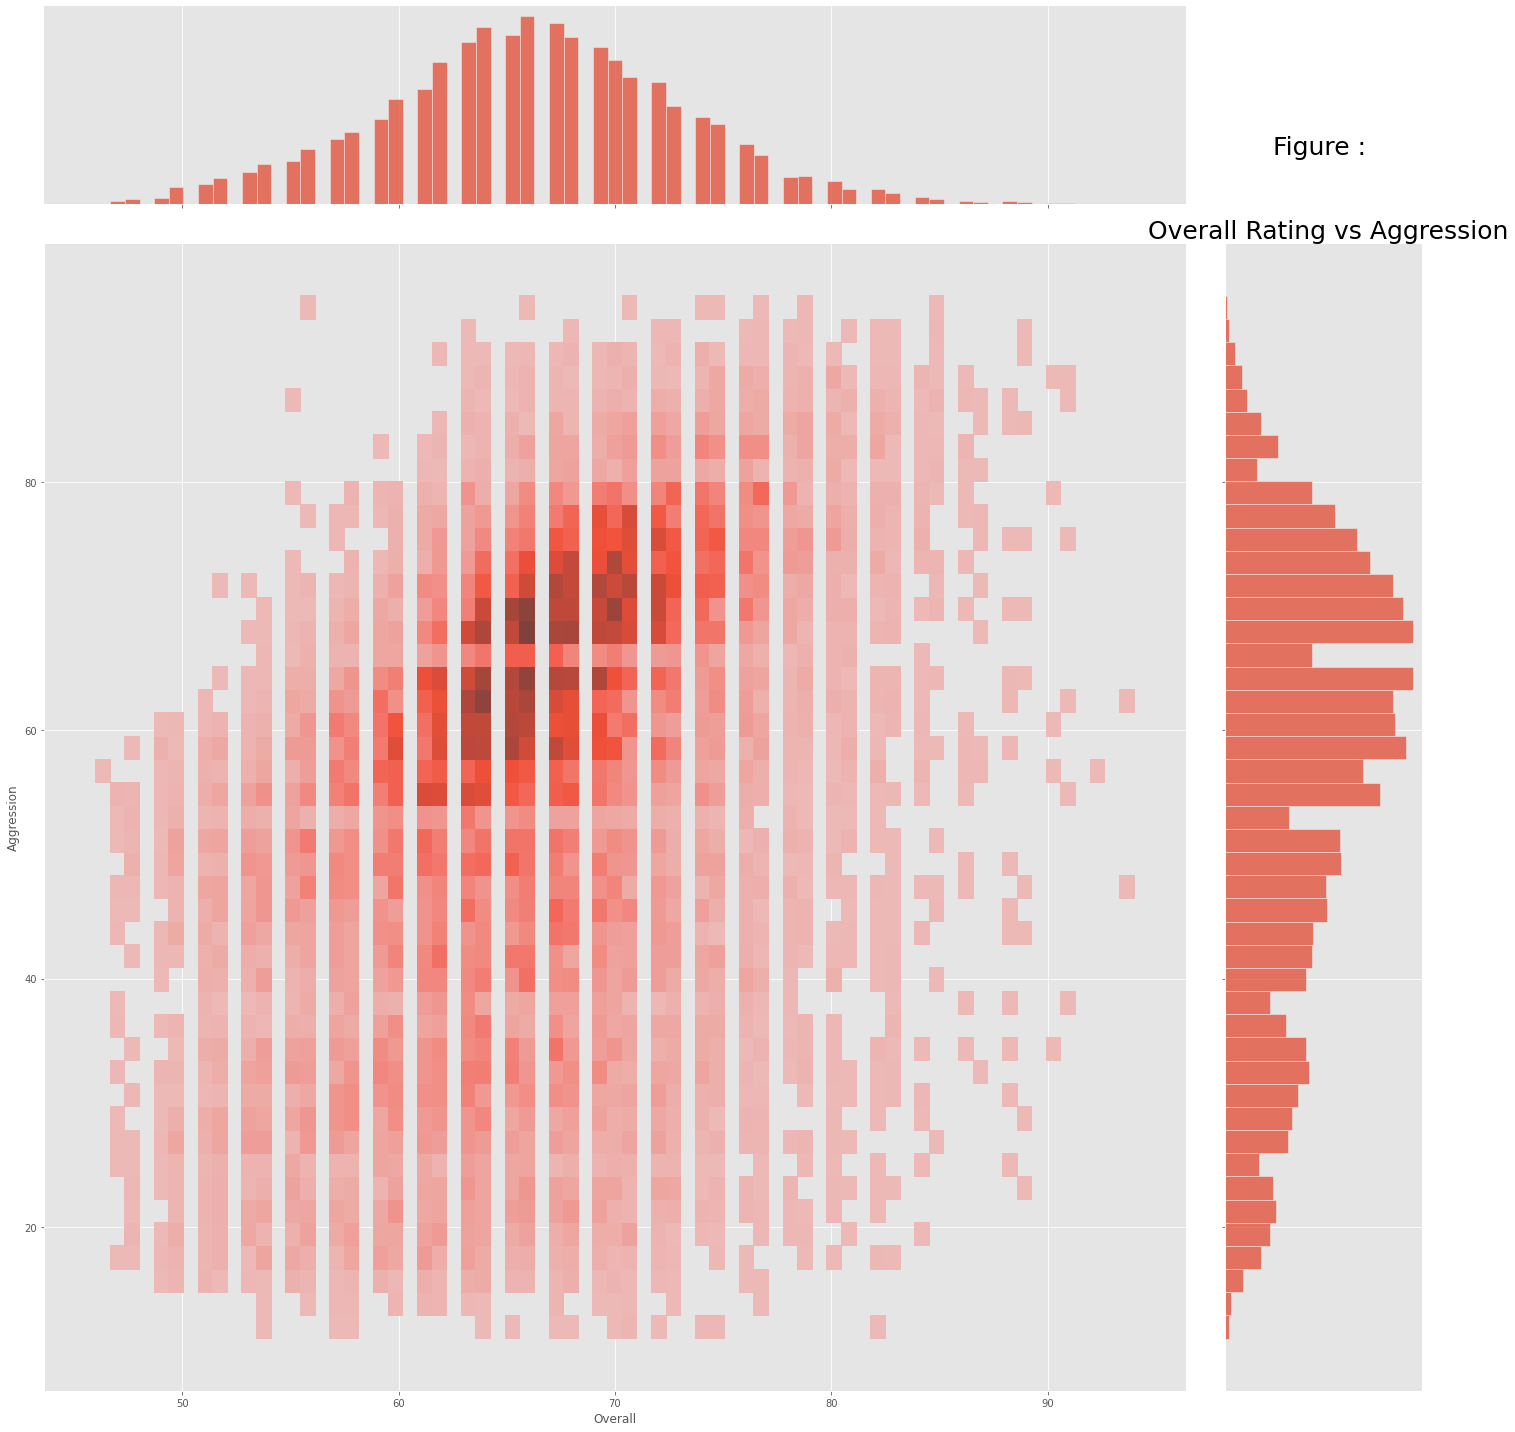

In [56]:
sns.jointplot(x="Overall", y="Aggression",data=df,
            
            kind="hist",height=20,palette="colorblind");
plt.title("Figure : \n\n\n Overall Rating vs Aggression", fontsize=25);